<a href="https://colab.research.google.com/github/AbubakarNdaman/AbubakarNdaman/blob/main/Road_Network_Data_Collection_for_Transport_Accessibility_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import & Libraries

In [2]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 7.5 MB/s eta 0:00:00


In [11]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import os
ox.settings.log_console = True
ox.settings.use_cache = True


##Define study area

In [5]:
place_name = "Murillo, Bolivia"

print(f"Study area selected: {place_name}")

Study area selected: Murillo, Bolivia


##Download road network from OSM

In [6]:
G = ox.graph_from_place(
    place_name,
    network_type="drive",
    simplify=True
)

G

##Basic network inspection

In [ ]:
stats = ox.basic_stats(G)
stats

##Convert network to GeoDataFrames

In [8]:
nodes, edges = ox.graph_to_gdfs(G)

nodes.head(), edges.head()

(                    y          x  street_count junction highway railway  \
 osmid                                                                     
 1184131825 -16.732984 -67.911649             3      NaN     NaN     NaN   
 1184131866 -16.733620 -67.909888             4      NaN     NaN     NaN   
 1184131988 -16.634552 -67.984919             3      NaN     NaN     NaN   
 1184132203 -16.659473 -67.909954             3      NaN     NaN     NaN   
 1184132276 -16.734820 -67.902273             3      NaN     NaN     NaN   
 
                                geometry  
 osmid                                    
 1184131825  POINT (-67.91165 -16.73298)  
 1184131866  POINT (-67.90989 -16.73362)  
 1184131988  POINT (-67.98492 -16.63455)  
 1184132203  POINT (-67.90995 -16.65947)  
 1184132276  POINT (-67.90227 -16.73482)  ,
                                                         osmid        highway  \
 u          v           key                                                     
 1

##Save processed data

In [12]:
os.makedirs("../data/processed", exist_ok=True)

nodes.to_file("../data/processed/nodes_sample.geojson", driver="GeoJSON")
edges.to_file("../data/processed/edges_sample.geojson", driver="GeoJSON")

##Quick visual check

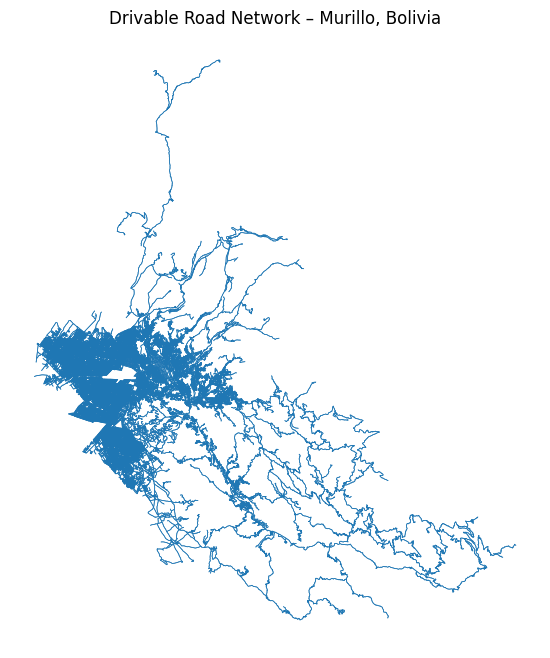

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
edges.plot(ax=ax, linewidth=0.5)
ax.set_title("Drivable Road Network – Murillo, Bolivia")
ax.axis("off")
plt.show()